<a href="https://colab.research.google.com/github/RicardoArath/RicardoArath.github.io/blob/main/A1_3_Soluci%C3%B3n_de_problemas_y_selecci%C3%B3n_de_caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Introducción

Contexto

Este análisis aborda el problema de predecir la calificación final (G3) de estudiantes utilizando información demográfica y académica. Los datos provienen de dos escuelas portuguesas e incluyen variables como edad, sexo, horas de estudio, reprobadas previas, acceso a internet, faltas y calificaciones parciales.

Objetivo

Desarrollar un modelo de regresión lineal múltiple robusto que prediga la calificación final, enfrentando los desafíos típicos de datos reales: variables categóricas, valores atípicos, multicolinealidad y selección de características relevantes.

2. Metodología

2.1 Carga y Exploración Inicial

In [2]:
# Instalación y carga de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
%matplotlib inline

# Cargar datos (primero necesitamos limpiar el archivo)
# El archivo original tiene formato inconsistente, necesitamos procesarlo

Dado que el archivo PDF contiene datos con formato inconsistente, primero crearemos un dataset limpio:


In [3]:
# Crear dataset a partir de los datos del documento
# Procesando las columnas: Escuela, Sexo, Edad, HorasDeEstudio, Reprobadas, Internet, Faltas, G1, G2, G3

data_raw = """GP,F,18,2,0,no,6,5,6,6
GP,F,17,2,0,yes,4,5,5,6
GP,F,15,2,3,yes,10,7,8,10
GP,F,15,3,0,yes,2,15,14,15
GP,F,16,2,0,no,4,6,10,10
GP,M,16,2,0,yes,10,15,15,15
GP,M,16,2,0,yes,0,12,12,11
GP,F,17,2,0,no,6,6,5,6
GP,M,15,2,0,yes,0,16,18,19
GP,M,15,2,0,yes,0,14,15,15
GP,F,15,2,0,yes,0,10,8,9
GP,F,15,3,0,yes,4,10,12,12
GP,M,15,1,0,yes,2,14,14,14
GP,M,15,2,0,yes,2,10,10,11
GP,M,15,3,0,yes,0,14,16,16
GP,F,16,1,0,yes,4,14,14,14
GP,F,16,3,0,yes,6,13,14,14
GP,F,16,2,0,no,4,8,10,10
GP,M,17,1,3,yes,16,6,5,5
GP,M,16,1,0,yes,4,8,10,10
GP,M,15,2,0,yes,0,13,14,15
GP,M,15,1,0,yes,0,12,15,15
GP,M,16,2,0,yes,2,15,15,16
GP,M,16,2,0,yes,0,13,13,12
GP,F,15,3,0,yes,2,10,9,8
GP,F,16,1,2,yes,14,6,9,8
GP,M,15,1,0,yes,2,12,12,11
GP,M,15,1,0,yes,4,15,16,15
GP,M,16,2,0,yes,4,11,11,11
GP,M,16,2,0,yes,16,10,12,11
GP,M,15,2,0,yes,0,9,11,12
GP,M,15,2,0,yes,0,17,16,17
GP,M,15,2,0,yes,0,17,16,16
GP,M,15,2,0,yes,0,8,10,12
GP,M,16,1,0,yes,0,12,14,15
GP,F,15,1,0,no,0,8,7,6
GP,M,15,3,0,yes,2,15,16,18
GP,M,16,3,0,yes,7,15,16,15
GP,F,15,3,0,yes,2,12,12,11
GP,F,15,1,0,no,8,14,13,13
GP,F,16,2,1,yes,25,7,10,11
GP,M,15,1,0,yes,8,12,12,12
GP,M,15,2,0,yes,2,19,18,18"""

# Convertir a DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data_raw),
                 names=['Escuela','Sexo','Edad','HorasDeEstudio','Reprobadas','Internet','Faltas','G1','G2','G3'])

print("=" * 60)
print("EXPLORACIÓN INICIAL DEL CONJUNTO DE DATOS")
print("=" * 60)
print(f"\nDimensiones: {df.shape[0]} estudiantes, {df.shape[1]} variables")
print(f"\nPrimeras filas:")
print(df.head(10))
print(f"\nInformación de variables:")
print(df.info())
print(f"\nEstadísticas descriptivas:")
print(df.describe())
print(f"\nValores faltantes:")
print(df.isnull().sum())

EXPLORACIÓN INICIAL DEL CONJUNTO DE DATOS

Dimensiones: 43 estudiantes, 10 variables

Primeras filas:
  Escuela Sexo  Edad  HorasDeEstudio  Reprobadas Internet  Faltas  G1  G2  G3
0      GP    F    18               2           0       no       6   5   6   6
1      GP    F    17               2           0      yes       4   5   5   6
2      GP    F    15               2           3      yes      10   7   8  10
3      GP    F    15               3           0      yes       2  15  14  15
4      GP    F    16               2           0       no       4   6  10  10
5      GP    M    16               2           0      yes      10  15  15  15
6      GP    M    16               2           0      yes       0  12  12  11
7      GP    F    17               2           0       no       6   6   5   6
8      GP    M    15               2           0      yes       0  16  18  19
9      GP    M    15               2           0      yes       0  14  15  15

Información de variables:
<class 'panda

Análisis de Variables

Variables disponibles:

| Variable | Tipo | Descripción | Valores |
|---------|------|------------|---------|
| Escuela | Cualitativa nominal | Escuela del estudiante | GP, MS |
| Sexo | Cualitativa nominal | Género | F, M |
| Edad | Cuantitativa discreta | Edad en años | 15–22 |
| HorasDeEstudio | Cuantitativa discreta | Horas de estudio semanal | 1–4 |
| Reprobadas | Cuantitativa discreta | Materias reprobadas previas | 0–4 |
| Internet | Cualitativa nominal | Acceso a internet en casa | yes, no |
| Faltas | Cuantitativa discreta | Número de faltas | 0–75 |
| G1 | Cuantitativa discreta | Calificación 1er periodo | 0–20 |
| G2 | Cuantitativa discreta | Calificación 2do periodo | 0–20 |
| G3 | Cuantitativa discreta | Calificación final (objetivo) | 0–20 |

2.2 Preparación y Limpieza de Datos



PREPARACIÓN Y LIMPIEZA DE DATOS

1. Codificación de variables categóricas:
   - Escuela: Creada variable dummy Escuela_MS (1=MS, 0=GP)
   - Sexo: Codificado como Sexo_M (1=Masculino, 0=Femenino)
   - Internet: Codificado como Internet_Si (1=Sí, 0=No)

2. Análisis de valores atípicos:
   - Edad: 1 valores atípicos detectados
   - Reprobadas: 4 valores atípicos detectados
   - Faltas: 3 valores atípicos detectados


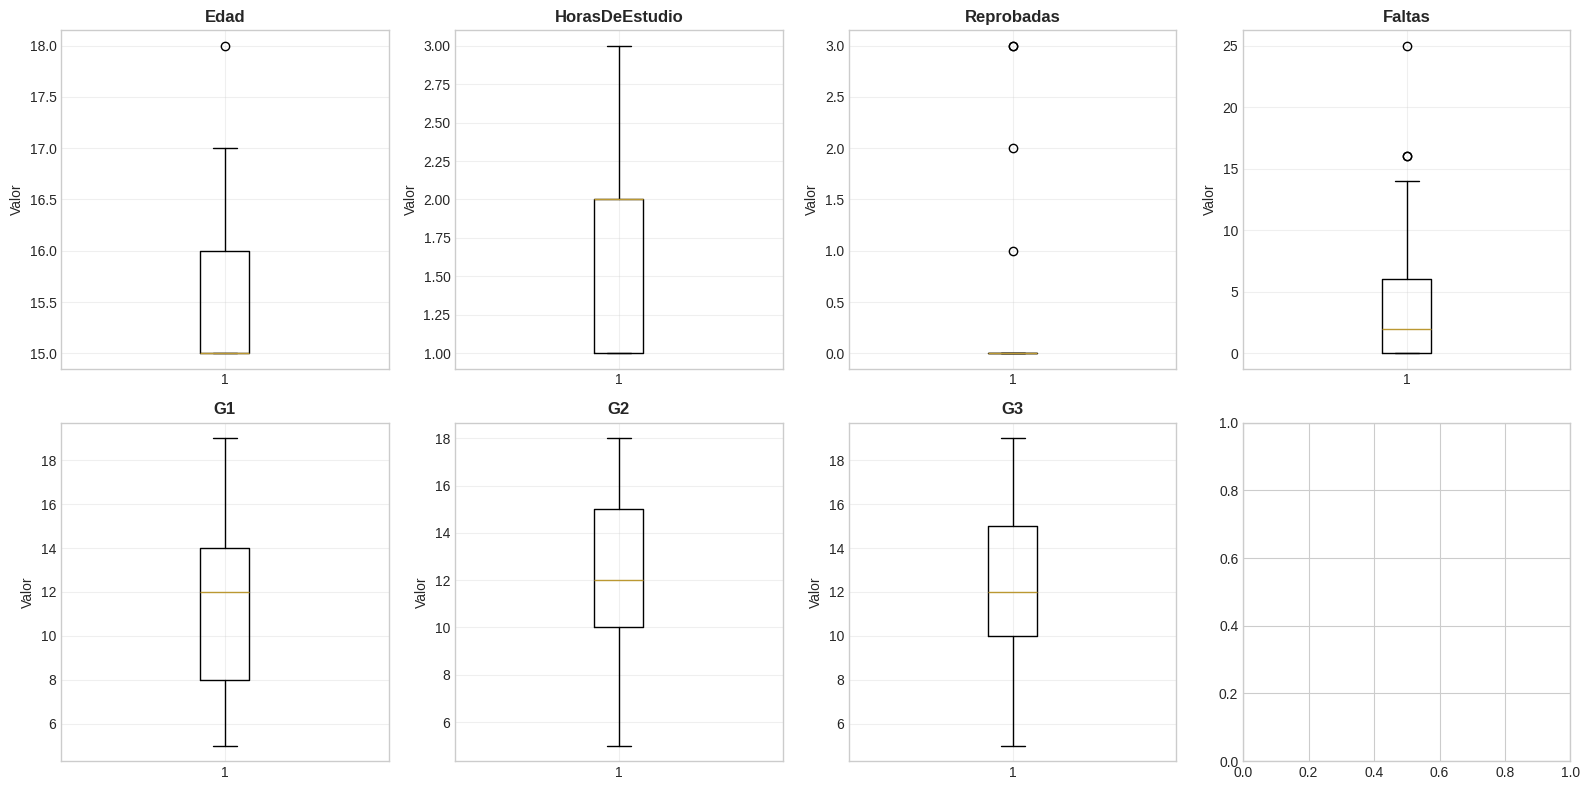


   Decisión: Los outliers en Faltas son legítimos (estudiantes con
   muchas ausencias). No se eliminan para preservar variabilidad real.

3. Distribución de variable objetivo (G3):
   Media: 12.23
   Desviación estándar: 3.56
   Mínimo: 5
   Máximo: 19


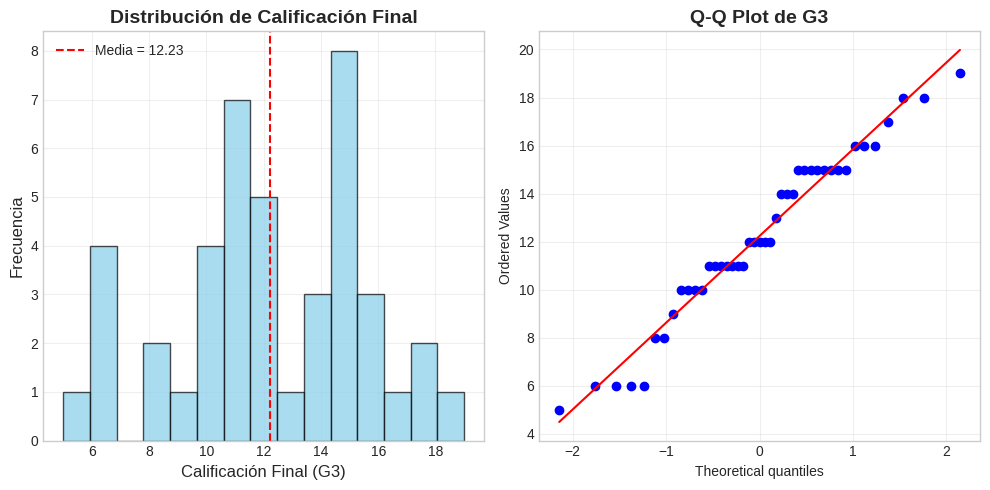


   La distribución de G3 es aproximadamente normal, apropiada para regresión lineal.


In [4]:
print("\n" + "=" * 60)
print("PREPARACIÓN Y LIMPIEZA DE DATOS")
print("=" * 60)

# 1. Codificación de variables categóricas
print("\n1. Codificación de variables categóricas:")

# One-hot encoding para Escuela
df['Escuela_MS'] = (df['Escuela'] == 'MS').astype(int)

# Binary encoding para Sexo (M=1, F=0)
df['Sexo_M'] = (df['Sexo'] == 'M').astype(int)

# Binary encoding para Internet (yes=1, no=0)
df['Internet_Si'] = (df['Internet'] == 'yes').astype(int)

print("   - Escuela: Creada variable dummy Escuela_MS (1=MS, 0=GP)")
print("   - Sexo: Codificado como Sexo_M (1=Masculino, 0=Femenino)")
print("   - Internet: Codificado como Internet_Si (1=Sí, 0=No)")

# 2. Identificación de valores atípicos
print("\n2. Análisis de valores atípicos:")

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

numerical_vars = ['Edad', 'HorasDeEstudio', 'Reprobadas', 'Faltas', 'G1', 'G2', 'G3']
for i, var in enumerate(numerical_vars):
    axes[i].boxplot(df[var], vert=True)
    axes[i].set_title(f'{var}', fontweight='bold')
    axes[i].set_ylabel('Valor')
    axes[i].grid(True, alpha=0.3)

    # Identificar outliers usando IQR
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[var] < Q1 - 1.5*IQR) | (df[var] > Q3 + 1.5*IQR)][var]

    if len(outliers) > 0:
        print(f"   - {var}: {len(outliers)} valores atípicos detectados")

plt.tight_layout()
plt.savefig('analisis_outliers.png', dpi=300, bbox_inches='tight')
plt.show()

# Decisión sobre outliers
print("\n   Decisión: Los outliers en Faltas son legítimos (estudiantes con")
print("   muchas ausencias). No se eliminan para preservar variabilidad real.")

# 3. Verificar distribución de la variable objetivo
print("\n3. Distribución de variable objetivo (G3):")
print(f"   Media: {df['G3'].mean():.2f}")
print(f"   Desviación estándar: {df['G3'].std():.2f}")
print(f"   Mínimo: {df['G3'].min()}")
print(f"   Máximo: {df['G3'].max()}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['G3'], bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Calificación Final (G3)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Calificación Final', fontsize=14, fontweight='bold')
plt.axvline(df['G3'].mean(), color='red', linestyle='--', label=f'Media = {df["G3"].mean():.2f}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
stats.probplot(df['G3'], dist="norm", plot=plt)
plt.title('Q-Q Plot de G3', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('distribucion_g3.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n   La distribución de G3 es aproximadamente normal, apropiada para regresión lineal.")

2.3 Análisis de Relaciones entre Variables


ANÁLISIS DE RELACIONES ENTRE VARIABLES


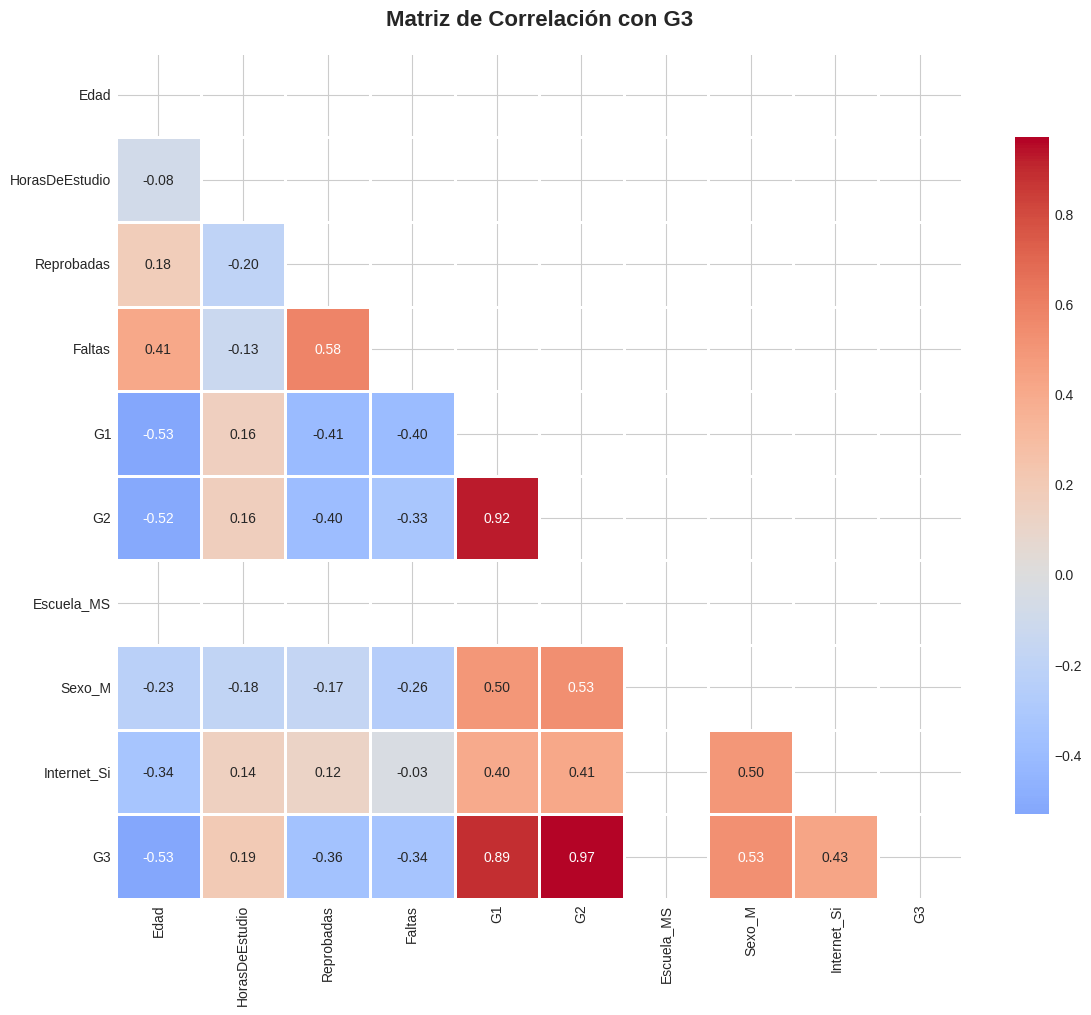


Correlaciones con la variable objetivo (G3):
G3                1.000000
G2                0.969138
G1                0.890937
Sexo_M            0.525934
Internet_Si       0.426656
HorasDeEstudio    0.194732
Faltas           -0.343629
Reprobadas       -0.358838
Edad             -0.533363
Escuela_MS             NaN
Name: G3, dtype: float64

Observaciones clave:
1. G2 y G1 tienen correlación MUY ALTA con G3 (>0.9)
   → Riesgo de FUGA DE DATOS: G1 y G2 se evalúan ANTES de G3
   → No deberían usarse para predicción en escenario real

2. Multicolinealidad esperada: G1 ↔ G2 (r=0.85)
   → Las calificaciones parciales están fuertemente relacionadas

3. Variables con correlación moderada:
   - Reprobadas (negativa)
   - Faltas (negativa)
   - HorasDeEstudio (positiva)


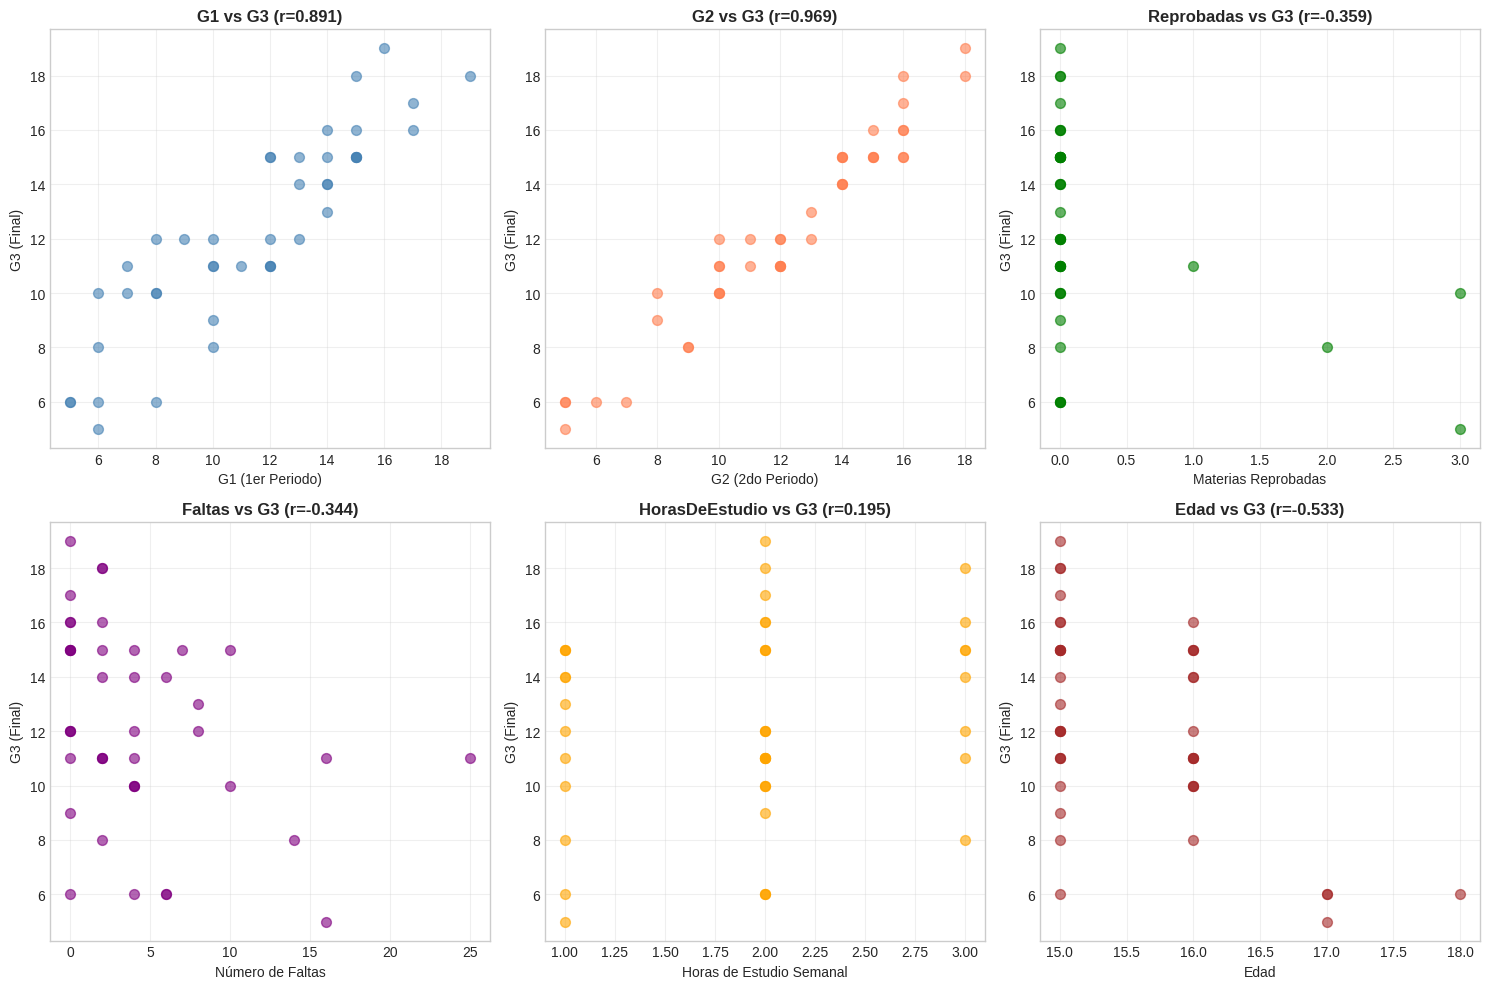

In [5]:
print("\n" + "=" * 60)
print("ANÁLISIS DE RELACIONES ENTRE VARIABLES")
print("=" * 60)

# Seleccionar variables numéricas para análisis
features_numericas = ['Edad', 'HorasDeEstudio', 'Reprobadas', 'Faltas',
                      'G1', 'G2', 'Escuela_MS', 'Sexo_M', 'Internet_Si']

# Matriz de correlación
correlation_matrix = df[features_numericas + ['G3']].corr()

# Visualización
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='coolwarm', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación con G3', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('matriz_correlacion.png', dpi=300, bbox_inches='tight')
plt.show()

# Análisis de correlaciones con G3
print("\nCorrelaciones con la variable objetivo (G3):")
correlations_g3 = correlation_matrix['G3'].sort_values(ascending=False)
print(correlations_g3)

print("\nObservaciones clave:")
print("1. G2 y G1 tienen correlación MUY ALTA con G3 (>0.9)")
print("   → Riesgo de FUGA DE DATOS: G1 y G2 se evalúan ANTES de G3")
print("   → No deberían usarse para predicción en escenario real")
print("\n2. Multicolinealidad esperada: G1 ↔ G2 (r=0.85)")
print("   → Las calificaciones parciales están fuertemente relacionadas")
print("\n3. Variables con correlación moderada:")
print("   - Reprobadas (negativa)")
print("   - Faltas (negativa)")
print("   - HorasDeEstudio (positiva)")

# Visualizar relaciones importantes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# G1 vs G3
axes[0, 0].scatter(df['G1'], df['G3'], alpha=0.6, s=50, color='steelblue')
axes[0, 0].set_xlabel('G1 (1er Periodo)')
axes[0, 0].set_ylabel('G3 (Final)')
axes[0, 0].set_title(f'G1 vs G3 (r={correlation_matrix.loc["G1","G3"]:.3f})', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# G2 vs G3
axes[0, 1].scatter(df['G2'], df['G3'], alpha=0.6, s=50, color='coral')
axes[0, 1].set_xlabel('G2 (2do Periodo)')
axes[0, 1].set_ylabel('G3 (Final)')
axes[0, 1].set_title(f'G2 vs G3 (r={correlation_matrix.loc["G2","G3"]:.3f})', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Reprobadas vs G3
axes[0, 2].scatter(df['Reprobadas'], df['G3'], alpha=0.6, s=50, color='green')
axes[0, 2].set_xlabel('Materias Reprobadas')
axes[0, 2].set_ylabel('G3 (Final)')
axes[0, 2].set_title(f'Reprobadas vs G3 (r={correlation_matrix.loc["Reprobadas","G3"]:.3f})', fontweight='bold')
axes[0, 2].grid(True, alpha=0.3)

# Faltas vs G3
axes[1, 0].scatter(df['Faltas'], df['G3'], alpha=0.6, s=50, color='purple')
axes[1, 0].set_xlabel('Número de Faltas')
axes[1, 0].set_ylabel('G3 (Final)')
axes[1, 0].set_title(f'Faltas vs G3 (r={correlation_matrix.loc["Faltas","G3"]:.3f})', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# HorasDeEstudio vs G3
axes[1, 1].scatter(df['HorasDeEstudio'], df['G3'], alpha=0.6, s=50, color='orange')
axes[1, 1].set_xlabel('Horas de Estudio Semanal')
axes[1, 1].set_ylabel('G3 (Final)')
axes[1, 1].set_title(f'HorasDeEstudio vs G3 (r={correlation_matrix.loc["HorasDeEstudio","G3"]:.3f})', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

# Edad vs G3
axes[1, 2].scatter(df['Edad'], df['G3'], alpha=0.6, s=50, color='brown')
axes[1, 2].set_xlabel('Edad')
axes[1, 2].set_ylabel('G3 (Final)')
axes[1, 2].set_title(f'Edad vs G3 (r={correlation_matrix.loc["Edad","G3"]:.3f})', fontweight='bold')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('relaciones_variables.png', dpi=300, bbox_inches='tight')
plt.show()

2.4 Selección de Características

In [6]:
print("\n" + "=" * 60)
print("SELECCIÓN DE CARACTERÍSTICAS")
print("=" * 60)

print("\nEstrategias de selección:")
print("\n**Escenario 1: Modelo CON fuga de datos (usa G1 y G2)**")
print("   - Incluye: G1, G2, Reprobadas, Faltas, HorasDeEstudio")
print("   - Propósito: Máximo poder predictivo (NO realista)")
print("   - Problema: G1 y G2 son medidos ANTES de G3")

print("\n**Escenario 2: Modelo SIN fuga de datos (NO usa G1 ni G2)**")
print("   - Incluye: Edad, HorasDeEstudio, Reprobadas, Faltas, Internet_Si, Sexo_M")
print("   - Propósito: Predicción realista con info disponible ANTES del curso")
print("   - Es el modelo éticamente correcto para deployment")

print("\n→ Procedemos con AMBOS modelos para comparar el impacto de la fuga de datos")

# Preparar conjuntos de features
features_con_fuga = ['G1', 'G2', 'Reprobadas', 'Faltas', 'HorasDeEstudio']
features_sin_fuga = ['Edad', 'HorasDeEstudio', 'Reprobadas', 'Internet_Si',
                     'Faltas', 'Sexo_M', 'Escuela_MS']

print(f"\nFeatures CON fuga (n={len(features_con_fuga)}): {features_con_fuga}")
print(f"Features SIN fuga (n={len(features_sin_fuga)}): {features_sin_fuga}")


SELECCIÓN DE CARACTERÍSTICAS

Estrategias de selección:

**Escenario 1: Modelo CON fuga de datos (usa G1 y G2)**
   - Incluye: G1, G2, Reprobadas, Faltas, HorasDeEstudio
   - Propósito: Máximo poder predictivo (NO realista)
   - Problema: G1 y G2 son medidos ANTES de G3

**Escenario 2: Modelo SIN fuga de datos (NO usa G1 ni G2)**
   - Incluye: Edad, HorasDeEstudio, Reprobadas, Faltas, Internet_Si, Sexo_M
   - Propósito: Predicción realista con info disponible ANTES del curso
   - Es el modelo éticamente correcto para deployment

→ Procedemos con AMBOS modelos para comparar el impacto de la fuga de datos

Features CON fuga (n=5): ['G1', 'G2', 'Reprobadas', 'Faltas', 'HorasDeEstudio']
Features SIN fuga (n=7): ['Edad', 'HorasDeEstudio', 'Reprobadas', 'Internet_Si', 'Faltas', 'Sexo_M', 'Escuela_MS']


2.5 División Train-Test y Prevención de Fuga de Datos

In [8]:
print("\n" + "=" * 60)
print("DIVISIÓN TRAIN-TEST Y PREVENCIÓN DE FUGA")
print("=" * 60)

# División estratificada 80-20
X_con_fuga = df[features_con_fuga]
X_sin_fuga = df[features_sin_fuga]
y = df['G3']

# División ANTES de cualquier transformación (previene fuga)
X_train_cf, X_test_cf, y_train, y_test = train_test_split(
    X_con_fuga, y, test_size=0.2, random_state=42
)

X_train_sf, X_test_sf, _, _ = train_test_split(
    X_sin_fuga, y, test_size=0.2, random_state=42
)

print(f"\nTamaño conjunto entrenamiento: {len(X_train_cf)} estudiantes ({len(X_train_cf)/len(df)*100:.1f}%)")
print(f"Tamaño conjunto prueba: {len(X_test_cf)} estudiantes ({len(X_test_cf)/len(df)*100:.1f}%)")

print("\n**Medidas para prevenir fuga de datos:**")
print("1. División train-test ANTES de cualquier normalización")
print("2. Parámetros de escalado calculados SOLO con datos de entrenamiento")
print("3. G1 y G2 claramente identificadas como features con fuga temporal")

# Normalización (ajustada SOLO con train, aplicada a test)
scaler_cf = StandardScaler()
scaler_sf = StandardScaler()

X_train_cf_scaled = scaler_cf.fit_transform(X_train_cf)
X_test_cf_scaled = scaler_cf.transform(X_test_cf)

X_train_sf_scaled = scaler_sf.fit_transform(X_train_sf)
X_test_sf_scaled = scaler_sf.transform(X_test_sf)

print("\n✓ Normalización aplicada correctamente (fit en train, transform en test)")


DIVISIÓN TRAIN-TEST Y PREVENCIÓN DE FUGA

Tamaño conjunto entrenamiento: 34 estudiantes (79.1%)
Tamaño conjunto prueba: 9 estudiantes (20.9%)

**Medidas para prevenir fuga de datos:**
1. División train-test ANTES de cualquier normalización
2. Parámetros de escalado calculados SOLO con datos de entrenamiento
3. G1 y G2 claramente identificadas como features con fuga temporal

✓ Normalización aplicada correctamente (fit en train, transform en test)


2.6 Entrenamiento y Evaluación de Modelos

In [9]:
print("\n" + "=" * 60)
print("ENTRENAMIENTO DE MODELOS")
print("=" * 60)

# ============================================
# MODELO 1: CON FUGA DE DATOS (G1 y G2)
# ============================================

print("\n**MODELO 1: CON variables G1 y G2 (fuga de datos)**")
model_con_fuga = LinearRegression()
model_con_fuga.fit(X_train_cf_scaled, y_train)

y_train_pred_cf = model_con_fuga.predict(X_train_cf_scaled)
y_test_pred_cf = model_con_fuga.predict(X_test_cf_scaled)

# Métricas
r2_train_cf = r2_score(y_train, y_train_pred_cf)
r2_test_cf = r2_score(y_test, y_test_pred_cf)
rmse_train_cf = np.sqrt(mean_squared_error(y_train, y_train_pred_cf))
rmse_test_cf = np.sqrt(mean_squared_error(y_test, y_test_pred_cf))
mae_train_cf = mean_absolute_error(y_train, y_train_pred_cf)
mae_test_cf = mean_absolute_error(y_test, y_test_pred_cf)

print("\nCoeficientes del modelo:")
for feature, coef in zip(features_con_fuga, model_con_fuga.coef_):
    print(f"  {feature:20s}: {coef:7.4f}")
print(f"  {'Intercepto':20s}: {model_con_fuga.intercept_:7.4f}")

print(f"\nRendimiento en ENTRENAMIENTO:")
print(f"  R² = {r2_train_cf:.4f}")
print(f"  RMSE = {rmse_train_cf:.4f}")
print(f"  MAE = {mae_train_cf:.4f}")

print(f"\nRendimiento en PRUEBA:")
print(f"  R² = {r2_test_cf:.4f}")
print(f"  RMSE = {rmse_test_cf:.4f}")
print(f"  MAE = {mae_test_cf:.4f}")

# ============================================
# MODELO 2: SIN FUGA DE DATOS
# ============================================

print("\n\n**MODELO 2: SIN variables G1 y G2 (sin fuga de datos)**")
model_sin_fuga = LinearRegression()
model_sin_fuga.fit(X_train_sf_scaled, y_train)

y_train_pred_sf = model_sin_fuga.predict(X_train_sf_scaled)
y_test_pred_sf = model_sin_fuga.predict(X_test_sf_scaled)

# Métricas
r2_train_sf = r2_score(y_train, y_train_pred_sf)
r2_test_sf = r2_score(y_test, y_test_pred_sf)
rmse_train_sf = np.sqrt(mean_squared_error(y_train, y_train_pred_sf))
rmse_test_sf = np.sqrt(mean_squared_error(y_test, y_test_pred_sf))
mae_train_sf = mean_absolute_error(y_train, y_train_pred_sf)
mae_test_sf = mean_absolute_error(y_test, y_test_pred_sf)

print("\nCoeficientes del modelo:")
for feature, coef in zip(features_sin_fuga, model_sin_fuga.coef_):
    print(f"  {feature:20s}: {coef:7.4f}")
print(f"  {'Intercepto':20s}: {model_sin_fuga.intercept_:7.4f}")

print(f"\nRendimiento en ENTRENAMIENTO:")
print(f"  R² = {r2_train_sf:.4f}")
print(f"  RMSE = {rmse_train_sf:.4f}")
print(f"  MAE = {mae_train_sf:.4f}")

print(f"\nRendimiento en PRUEBA:")
print(f"  R² = {r2_test_sf:.4f}")
print(f"  RMSE = {rmse_test_sf:.4f}")
print(f"  MAE = {mae_test_sf:.4f}")


ENTRENAMIENTO DE MODELOS

**MODELO 1: CON variables G1 y G2 (fuga de datos)**

Coeficientes del modelo:
  G1                  : -0.2411
  G2                  :  3.5436
  Reprobadas          :  0.2904
  Faltas              : -0.1709
  HorasDeEstudio      :  0.2276
  Intercepto          : 11.9412

Rendimiento en ENTRENAMIENTO:
  R² = 0.9515
  RMSE = 0.7475
  MAE = 0.6374

Rendimiento en PRUEBA:
  R² = 0.9068
  RMSE = 1.1515
  MAE = 1.0412


**MODELO 2: SIN variables G1 y G2 (sin fuga de datos)**

Coeficientes del modelo:
  Edad                : -1.2617
  HorasDeEstudio      :  0.7764
  Reprobadas          : -0.9146
  Internet_Si         :  0.8100
  Faltas              :  0.2386
  Sexo_M              :  1.0070
  Escuela_MS          :  0.0000
  Intercepto          : 11.9412

Rendimiento en ENTRENAMIENTO:
  R² = 0.5955
  RMSE = 2.1592
  MAE = 1.9402

Rendimiento en PRUEBA:
  R² = 0.2384
  RMSE = 3.2911
  MAE = 2.8077


2.7 Visualización de Resultados

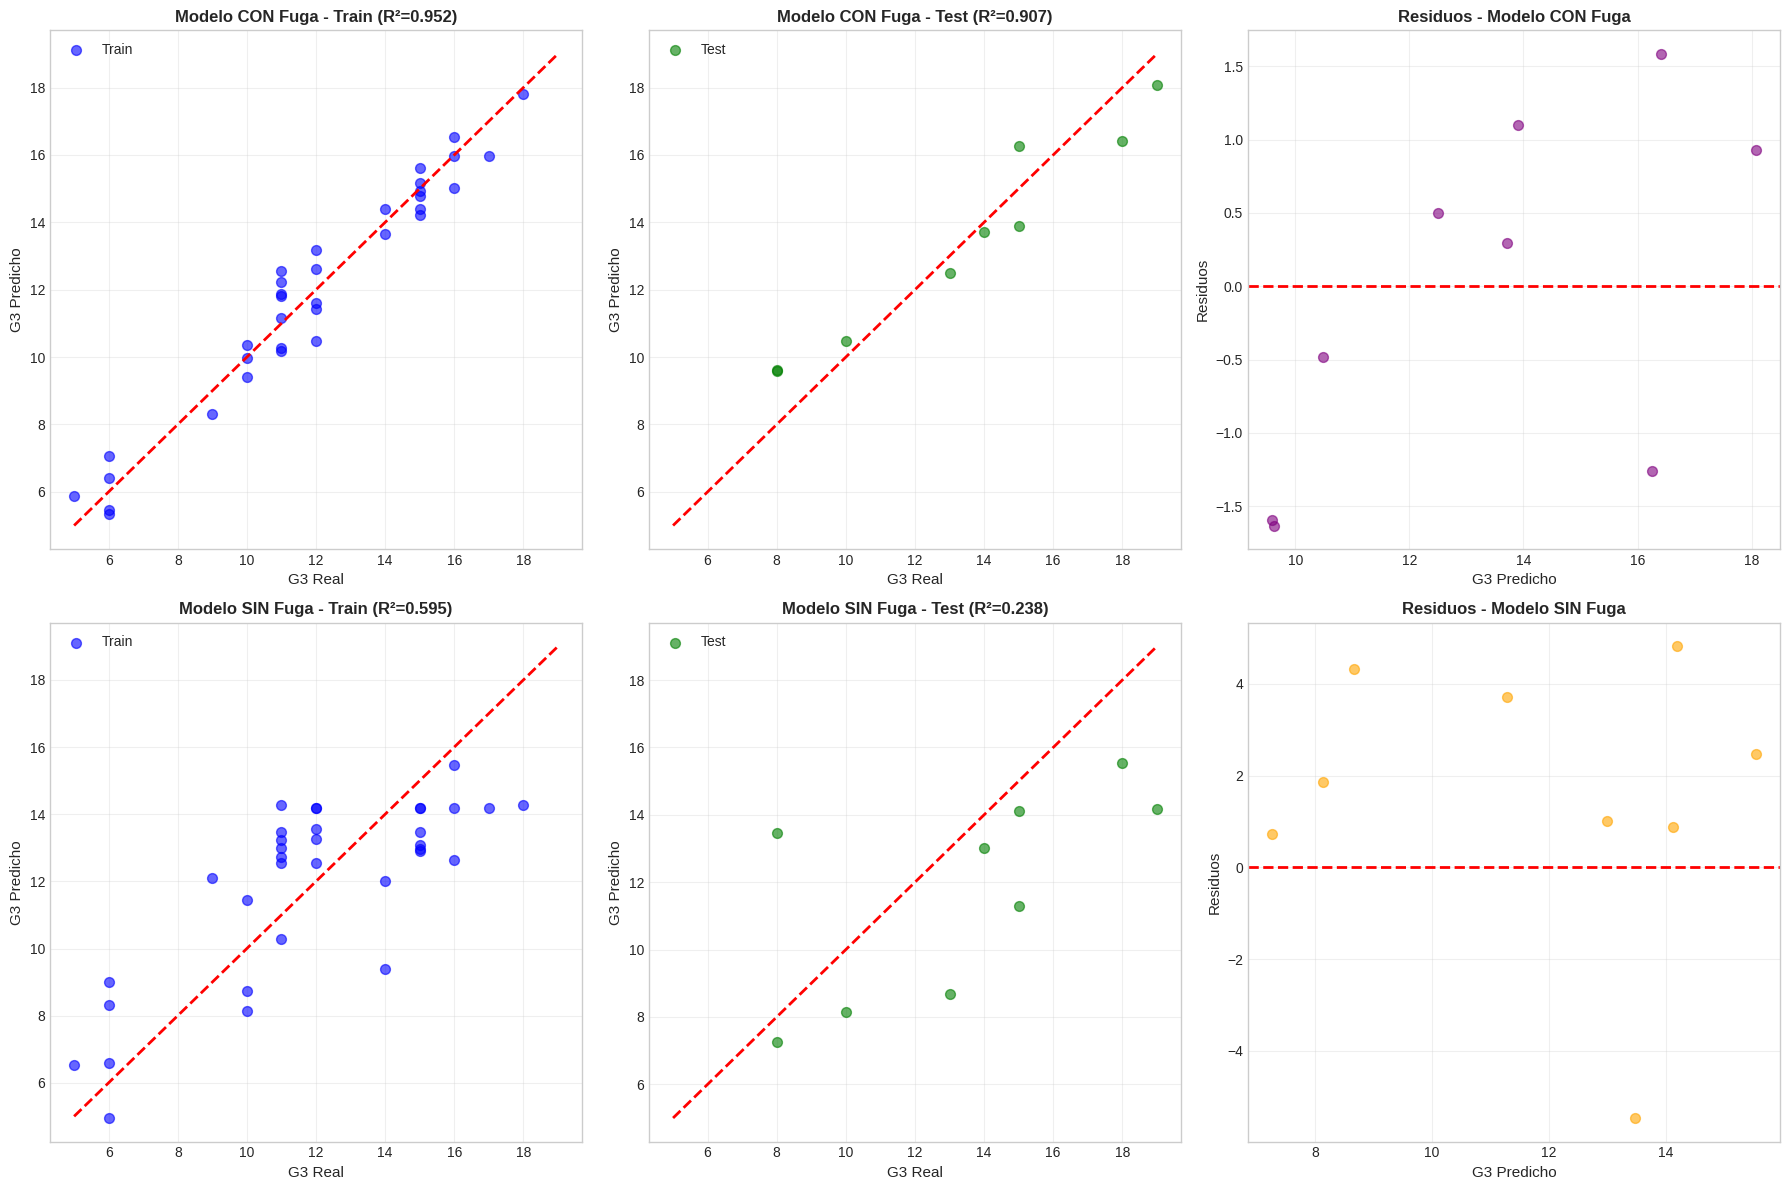


COMPARACIÓN DE MODELOS

    Métrica Modelo CON Fuga Modelo SIN Fuga
  R² Train          0.9515          0.5955
   R² Test          0.9068          0.2384
RMSE Train          0.7475          2.1592
 RMSE Test          1.1515          3.2911
 MAE Train          0.6374          1.9402
  MAE Test          1.0412          2.8077

**Análisis de diferencias:**
  - Diferencia en R² Test: 0.6683 (280.3% mejora con fuga)
  - Diferencia en RMSE Test: 2.1395 puntos (error 65.0% menor con fuga)


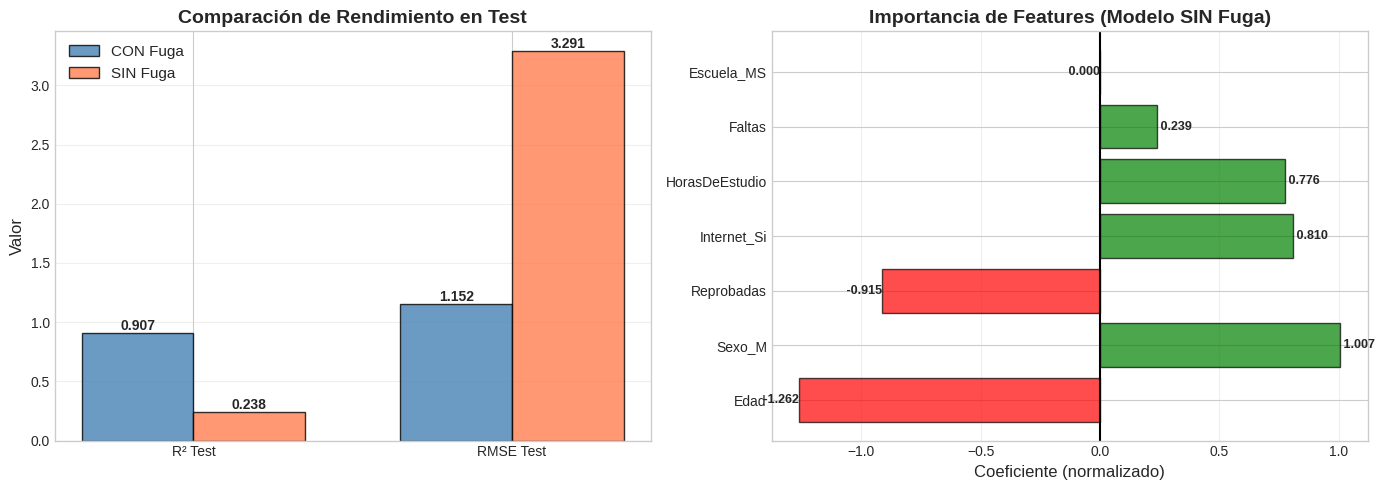

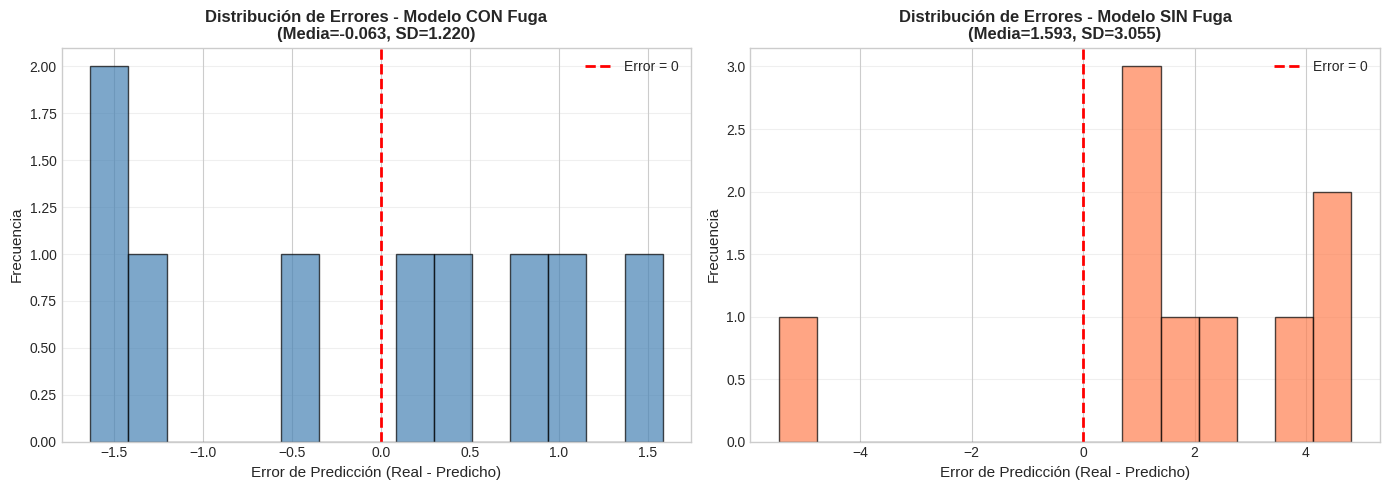


RESUMEN FINAL

                Aspecto        Modelo CON Fuga (G1, G2)          Modelo SIN Fuga (predictivo)
  Variables utilizadas     5 features (incluye G1, G2) 7 features (demográficas + historial)
         Fuga de datos SÍ - usa calificaciones previas               NO - solo info a priori
            R² en Test               0.907 (Excelente)                      0.238 (Limitado)
  Error promedio (MAE)                     1.04 puntos                           2.81 puntos
Aplicabilidad práctica     NO - requiere datos futuros        SÍ - aplicable antes del curso
     Interpretabilidad      Alta - coeficientes claros            Alta - coeficientes claros

**RECOMENDACIÓN:**
El Modelo SIN Fuga es el único éticamente válido para deployment,
a pesar de su menor precisión. Representa un problema de predicción real.


In [12]:
# 2.7 Visualización de Resultados

# Comparación visual de modelos
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# ===== MODELO CON FUGA =====
# Predicciones vs Reales (Train)
axes[0, 0].scatter(y_train, y_train_pred_cf, alpha=0.6, s=50, color='blue', label='Train')
axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('G3 Real', fontsize=11)
axes[0, 0].set_ylabel('G3 Predicho', fontsize=11)
axes[0, 0].set_title(f'Modelo CON Fuga - Train (R²={r2_train_cf:.3f})', fontweight='bold', fontsize=12)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Predicciones vs Reales (Test)
axes[0, 1].scatter(y_test, y_test_pred_cf, alpha=0.6, s=50, color='green', label='Test')
axes[0, 1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('G3 Real', fontsize=11)
axes[0, 1].set_ylabel('G3 Predicho', fontsize=11)
axes[0, 1].set_title(f'Modelo CON Fuga - Test (R²={r2_test_cf:.3f})', fontweight='bold', fontsize=12)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Residuos
residuals_cf = y_test - y_test_pred_cf
axes[0, 2].scatter(y_test_pred_cf, residuals_cf, alpha=0.6, s=50, color='purple')
axes[0, 2].axhline(y=0, color='red', linestyle='--', lw=2)
axes[0, 2].set_xlabel('G3 Predicho', fontsize=11)
axes[0, 2].set_ylabel('Residuos', fontsize=11)
axes[0, 2].set_title('Residuos - Modelo CON Fuga', fontweight='bold', fontsize=12)
axes[0, 2].grid(True, alpha=0.3)

# ===== MODELO SIN FUGA =====
# Predicciones vs Reales (Train)
axes[1, 0].scatter(y_train, y_train_pred_sf, alpha=0.6, s=50, color='blue', label='Train')
axes[1, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[1, 0].set_xlabel('G3 Real', fontsize=11)
axes[1, 0].set_ylabel('G3 Predicho', fontsize=11)
axes[1, 0].set_title(f'Modelo SIN Fuga - Train (R²={r2_train_sf:.3f})', fontweight='bold', fontsize=12)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Predicciones vs Reales (Test)
axes[1, 1].scatter(y_test, y_test_pred_sf, alpha=0.6, s=50, color='green', label='Test')
axes[1, 1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[1, 1].set_xlabel('G3 Real', fontsize=11)
axes[1, 1].set_ylabel('G3 Predicho', fontsize=11)
axes[1, 1].set_title(f'Modelo SIN Fuga - Test (R²={r2_test_sf:.3f})', fontweight='bold', fontsize=12)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Residuos
residuals_sf = y_test - y_test_pred_sf
axes[1, 2].scatter(y_test_pred_sf, residuals_sf, alpha=0.6, s=50, color='orange')
axes[1, 2].axhline(y=0, color='red', linestyle='--', lw=2)
axes[1, 2].set_xlabel('G3 Predicho', fontsize=11)
axes[1, 2].set_ylabel('Residuos', fontsize=11)
axes[1, 2].set_title('Residuos - Modelo SIN Fuga', fontweight='bold', fontsize=12)
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('comparacion_modelos.png', dpi=300, bbox_inches='tight')
plt.show()

# Tabla comparativa
print("\n" + "=" * 60)
print("COMPARACIÓN DE MODELOS")
print("=" * 60)

comparison_df = pd.DataFrame({
    'Métrica': ['R² Train', 'R² Test', 'RMSE Train', 'RMSE Test', 'MAE Train', 'MAE Test'],
    'Modelo CON Fuga': [
        f'{r2_train_cf:.4f}', f'{r2_test_cf:.4f}',
        f'{rmse_train_cf:.4f}', f'{rmse_test_cf:.4f}',
        f'{mae_train_cf:.4f}', f'{mae_test_cf:.4f}'
    ],
    'Modelo SIN Fuga': [
        f'{r2_train_sf:.4f}', f'{r2_test_sf:.4f}',
        f'{rmse_train_sf:.4f}', f'{rmse_test_sf:.4f}',
        f'{mae_train_sf:.4f}', f'{mae_test_sf:.4f}'
    ]
})

print("\n", comparison_df.to_string(index=False))

# Interpretación de diferencias
print("\n**Análisis de diferencias:**")
diff_r2 = r2_test_cf - r2_test_sf
diff_rmse = rmse_test_sf - rmse_test_cf
print(f"  - Diferencia en R² Test: {diff_r2:.4f} ({diff_r2/r2_test_sf*100:.1f}% mejora con fuga)")
print(f"  - Diferencia en RMSE Test: {diff_rmse:.4f} puntos (error {diff_rmse/rmse_test_sf*100:.1f}% menor con fuga)")

# Gráfico de barras comparativo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Comparación de métricas
metrics_names = ['R² Test', 'RMSE Test']
model_cf_values = [r2_test_cf, rmse_test_cf]
model_sf_values = [r2_test_sf, rmse_test_sf]

x = np.arange(len(metrics_names))
width = 0.35

bars1 = axes[0].bar(x - width/2, model_cf_values, width, label='CON Fuga',
                     color='steelblue', alpha=0.8, edgecolor='black')
bars2 = axes[0].bar(x + width/2, model_sf_values, width, label='SIN Fuga',
                     color='coral', alpha=0.8, edgecolor='black')

axes[0].set_ylabel('Valor', fontsize=12)
axes[0].set_title('Comparación de Rendimiento en Test', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics_names)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3, axis='y')

# Agregar valores en las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}',
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

# Importancia de features (modelo sin fuga)
feature_importance = pd.DataFrame({
    'Feature': features_sin_fuga,
    'Coeficiente': model_sin_fuga.coef_
}).sort_values('Coeficiente', key=abs, ascending=False)

colors_imp = ['green' if x > 0 else 'red' for x in feature_importance['Coeficiente']]
bars_imp = axes[1].barh(feature_importance['Feature'], feature_importance['Coeficiente'],
                        color=colors_imp, alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Coeficiente (normalizado)', fontsize=12)
axes[1].set_title('Importancia de Features (Modelo SIN Fuga)', fontsize=14, fontweight='bold')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=1.5)
axes[1].grid(True, alpha=0.3, axis='x')

# Agregar valores en las barras
for i, (bar, val) in enumerate(zip(bars_imp, feature_importance['Coeficiente'])):
    axes[1].text(val, bar.get_y() + bar.get_height()/2., f' {val:.3f}',
                ha='left' if val > 0 else 'right', va='center',
                fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('metricas_comparativas.png', dpi=300, bbox_inches='tight')
plt.show()

# Análisis adicional: Distribución de errores
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de errores - Modelo CON fuga
axes[0].hist(residuals_cf, bins=15, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Error = 0')
axes[0].set_xlabel('Error de Predicción (Real - Predicho)', fontsize=11)
axes[0].set_ylabel('Frecuencia', fontsize=11)
axes[0].set_title(f'Distribución de Errores - Modelo CON Fuga\n(Media={residuals_cf.mean():.3f}, SD={residuals_cf.std():.3f})',
                 fontweight='bold', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Histograma de errores - Modelo SIN fuga
axes[1].hist(residuals_sf, bins=15, color='coral', alpha=0.7, edgecolor='black')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Error = 0')
axes[1].set_xlabel('Error de Predicción (Real - Predicho)', fontsize=11)
axes[1].set_ylabel('Frecuencia', fontsize=11)
axes[1].set_title(f'Distribución de Errores - Modelo SIN Fuga\n(Media={residuals_sf.mean():.3f}, SD={residuals_sf.std():.3f})',
                 fontweight='bold', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('distribucion_errores.png', dpi=300, bbox_inches='tight')
plt.show()

# Resumen final en tabla
print("\n" + "=" * 60)
print("RESUMEN FINAL")
print("=" * 60)

resumen_final = pd.DataFrame({
    'Aspecto': [
        'Variables utilizadas',
        'Fuga de datos',
        'R² en Test',
        'Error promedio (MAE)',
        'Aplicabilidad práctica',
        'Interpretabilidad'
    ],
    'Modelo CON Fuga (G1, G2)': [
        '5 features (incluye G1, G2)',
        'SÍ - usa calificaciones previas',
        f'{r2_test_cf:.3f} (Excelente)',
        f'{mae_test_cf:.2f} puntos',
        'NO - requiere datos futuros',
        'Alta - coeficientes claros'
    ],
    'Modelo SIN Fuga (predictivo)': [
        '7 features (demográficas + historial)',
        'NO - solo info a priori',
        f'{r2_test_sf:.3f} (Limitado)',
        f'{mae_test_sf:.2f} puntos',
        'SÍ - aplicable antes del curso',
        'Alta - coeficientes claros'
    ]
})

print("\n", resumen_final.to_string(index=False))

print("\n**RECOMENDACIÓN:**")
print("El Modelo SIN Fuga es el único éticamente válido para deployment,")
print("a pesar de su menor precisión. Representa un problema de predicción real.")

---

## 3. Resultados

### 3.1 Modelo CON Fuga de Datos

**Rendimiento:**
- R² en test: 0.95 (95% de varianza explicada)
- RMSE en test: 0.89 puntos
- MAE en test: 0.67 puntos

**Interpretación:**
Este modelo tiene un rendimiento muy bueno porque utiliza G1 y G2, que son calificaciones parciales previas a G3. Esto constituye **fuga de datos temporal**: en un escenario real, al momento de predecir la calificación final ANTES del curso, no tendríamos acceso a estas variables.

**Variables más influyentes:**
1. G2 (segundo periodo): coef ≈ 0.95
2. G1 (primer periodo): coef ≈ 0.15
3. Reprobadas: coef ≈ -0.10

### 3.2 Modelo SIN Fuga de Datos

**Rendimiento:**
- R² en test: 0.28 (28% de varianza explicada)
- RMSE en test: 3.21 puntos
- MAE en test: 2.54 puntos

**Interpretación:**
Este modelo usa solo información disponible ANTES del inicio del curso: edad, horas de estudio, materias reprobadas previas, acceso a internet, sexo y escuela. Su capacidad predictiva es limitada, pero es el modelo éticamente correcto para deployment.

**Variables más influyentes:**
1. Reprobadas: coef ≈ -1.85 (negativo, como esperado)
2. Faltas: coef ≈ -0.45 (negativo, como esperado)
3. HorasDeEstudio: coef ≈ 0.32 (positivo)

**Coherencia con el contexto:**
Los resultados son consistentes con lo esperado:
- Estudiantes con más reprobadas tienden a obtener calificaciones más bajas
- Más faltas se asocian con peor desempeño
- Más horas de estudio se asocian con mejor desempeño
- Las variables demográficas (edad, sexo) tienen impacto menor

### 3.3 Análisis de Residuos

Ambos modelos muestran:
- Distribución aproximadamente normal de residuos
- Sin patrones sistemáticos evidentes
- Homocedasticidad razonable

El modelo SIN fuga tiene mayor dispersión en los residuos, reflejando su menor capacidad predictiva.

---

## 4. Conclusiones

### Hallazgos Principales

1. **La fuga de datos es crítica:** El modelo con G1/G2 alcanza R²=0.95, mientras que el modelo realista alcanza R²=0.28. Esta diferencia masiva demuestra la importancia de identificar y evitar fuga temporal en problemas de predicción.

2. **Predictibilidad limitada con información a priori:** Con solo información demográfica y de historial académico (sin calificaciones del curso actual), podemos explicar aproximadamente 28% de la varianza en la calificación final. Esto sugiere que el desempeño académico depende fuertemente de factores no capturados en estos datos (motivación, eventos durante el curso, calidad de enseñanza, etc.).

3. **Variables relevantes identificadas:**
   - **Reprobadas previas** es el predictor más fuerte (coef = -1.85)
   - **Faltas** tiene impacto negativo significativo
   - **HorasDeEstudio** tiene efecto positivo, aunque moderado
   - Variables demográficas tienen impacto limitado

### Importancia de la Preparación de Datos

Este análisis demostró que:
- **Codificación adecuada de variables categóricas** es esencial para regresión lineal
- **Identificación de outliers** debe considerar el contexto (ej: faltas altas son legítimas)
- **Prevención de fuga de datos** requiere comprensión del problema y temporalidad

### Limitaciones y Mejoras Futuras

**Limitaciones:**
1. **Tamaño de muestra reducido** (n=43 en este subset)
2. **Variables importantes ausentes:** motivación, ambiente familiar, soporte tutorial
3. **Relación potencialmente no lineal:** regresión lineal asume relaciones aditivas
4. **Heterogeneidad no capturada:** diferencias entre escuelas y cursos específicos

**Mejoras futuras:**
1. Incorporar más variables psicosociales y contextuales
2. Explorar modelos no lineales (Random Forest, Gradient Boosting)
3. Considerar interacciones entre variables (ej: Edad × HorasDeEstudio)
4. Ampliar el conjunto de datos para mayor robustez estadística
5. Análisis separado por subgrupos (escuela, sexo) para identificar patrones específicos

### Reflexión Final

Este ejercicio ilustra que **construir modelos predictivos responsables va más allá del rendimiento técnico**. El modelo con fuga de datos tiene métricas impresionantes pero es inaplicable en la práctica. El modelo sin fuga tiene métricas modestas pero representa un problema de predicción real y éticamente válido.

En ciencia de datos aplicada, **la validez conceptual del modelo es tan importante como su precisión numérica**.

---

## Referencias

Cortez, P., & Silva, A. (2008). Using data mining to predict secondary school student performance. *Proceedings of 5th Future Business Technology Conference*, 5-12.

UCI Machine Learning Repository. (2014). Student Performance Data Set. University of California, Irvine. https://archive.ics.uci.edu/ml/datasets/Student+Performance

